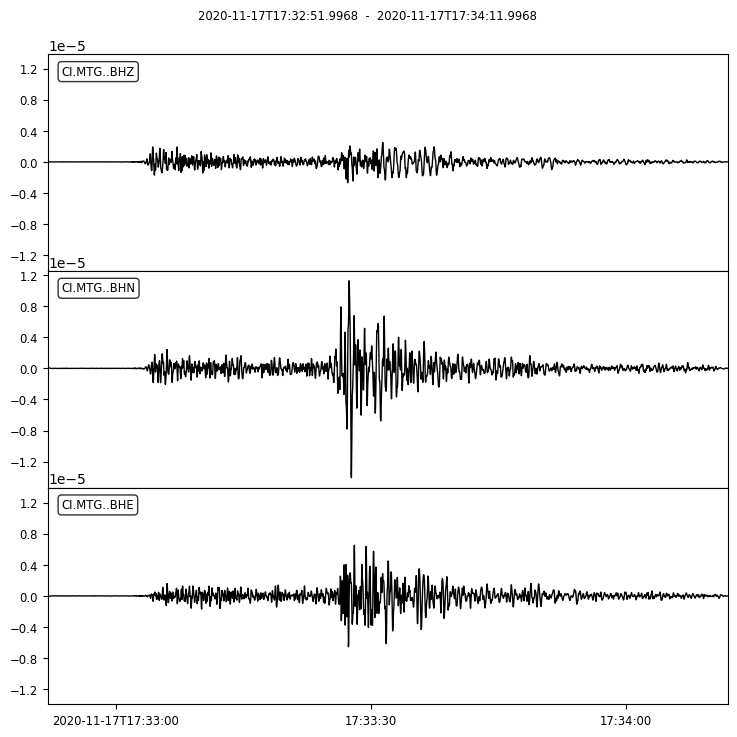

3 Trace(s) in Stream:
CI.MTG..BHE | 2020-11-17T17:32:51.996800Z - 2020-11-17T17:34:11.996800Z | 40.0 Hz, 3201 samples
CI.MTG..BHN | 2020-11-17T17:32:51.996800Z - 2020-11-17T17:34:11.996800Z | 40.0 Hz, 3201 samples
CI.MTG..BHZ | 2020-11-17T17:32:51.996800Z - 2020-11-17T17:34:11.996800Z | 40.0 Hz, 3201 samples


In [1]:
###  Field Waveform with sP wave
# ** Satge-I: Download the field waveforms using obspy
from obspy import read
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt

client = Client("SCEDC")

#origin_time = UTCDateTime("2020-11-17T17:32:32Z")

origin_time = UTCDateTime("2020-11-17T17:32:32Z")
st = client.get_waveforms("CI", "MTG", "**", "BH*", origin_time+20, origin_time+100, attach_response=True)
st_copy = st.copy()
st_copy.remove_response(output="VEL")

# Filtering with a lowpass on a copy of the original Trace
st_copy.filter('bandpass', freqmin=1.0, freqmax=7.0, corners=2, zerophase=True)
st_copy.plot()
print(st_copy)

st_copy[0].write("Waveform.BHE",format="SAC")
st_copy[1].write("Waveform.BHN",format="SAC")
st_copy[2].write("Waveform.BHZ",format="SAC")


### station info: CI.MTG, 33.19915,-116.64727,1092m https://service.scedc.caltech.edu/SCSNStationMap/station.html
### event info: M 3.5 - 23km NW of Ludlow, CA 2020-11-17 17:32:32 (UTC)34.862°N 116.340°W5.3 km depth https://earthquake.usgs.gov/earthquakes/eventpage/ci39468407/executive

In [5]:
# Mark P- and S-wave first arrival
from obspy import read
import matplotlib.pyplot as plt
import numpy as np
from obspy.taup import TauPyModel
import os
from obspy.clients.iris import Client
client = Client()
model = TauPyModel(model="iasp91")

st = read("./Waveform.BHE")
st += read("./Waveform.BHN")
st += read("./Waveform.BHZ")
print(st)

sachd = st[0].stats.sac 
print(sachd)

#distaz = client.distaz(sachd["stla"], sachd["stlo"], sachd["evla"], sachd["evlo"])
distaz = client.distaz(33.20, -116.65, 34.862, -116.340)
gcarc = distaz['distance']
print(gcarc)
arrival_P = model.get_travel_times(source_depth_in_km=5.3, distance_in_degree=gcarc, phase_list=["P"])
arrival_S = model.get_travel_times(source_depth_in_km=5.3, distance_in_degree=gcarc, phase_list=["S"])

sachd["t1"] = arrival_P[0].time + sachd["b"] - 20
sachd["kt1"] = arrival_P[0].name
sachd["t2"] = arrival_S[0].time + sachd["b"] - 20
sachd["kt2"] = arrival_S[0].name


st[0].write("Waveform.BHE",format="SAC")
st[1].write("Waveform.BHN",format="SAC")
st[2].write("Waveform.BHZ",format="SAC")

3 Trace(s) in Stream:
CI.MTG..BHE | 2020-11-17T17:32:51.996800Z - 2020-11-17T17:34:11.996800Z | 40.0 Hz, 3201 samples
CI.MTG..BHN | 2020-11-17T17:32:51.996800Z - 2020-11-17T17:34:11.996800Z | 40.0 Hz, 3201 samples
CI.MTG..BHZ | 2020-11-17T17:32:51.996800Z - 2020-11-17T17:34:11.996800Z | 40.0 Hz, 3201 samples
AttribDict({'delta': 0.025, 'depmin': -6.540592e-06, 'depmax': 6.5354529e-06, 'scale': 1.0, 'b': 0.00079999998, 'e': 80.000801, 't1': 9.9874268, 't2': 32.767529, 'depmen': -1.5773269e-10, 'nzyear': 2020, 'nzjday': 322, 'nzhour': 17, 'nzmin': 32, 'nzsec': 51, 'nzmsec': 996, 'nvhdr': 6, 'npts': 3201, 'iftype': 1, 'iztype': 9, 'leven': 1, 'lpspol': 1, 'lovrok': 1, 'lcalda': 0, 'kstnm': 'MTG', 'kt1': 'P', 'kt2': 'S', 'kcmpnm': 'BHE', 'knetwk': 'CI'})
1.6798


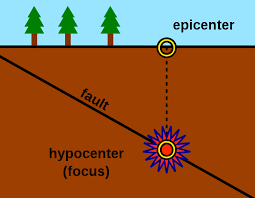

3 Trace(s) in Stream:
CI.MTG..BHE | 2020-11-17T17:32:51.996800Z - 2020-11-17T17:34:11.996800Z | 40.0 Hz, 3201 samples
CI.MTG..BHN | 2020-11-17T17:32:51.996800Z - 2020-11-17T17:34:11.996800Z | 40.0 Hz, 3201 samples
CI.MTG..BHZ | 2020-11-17T17:32:51.996800Z - 2020-11-17T17:34:11.996800Z | 40.0 Hz, 3201 samples


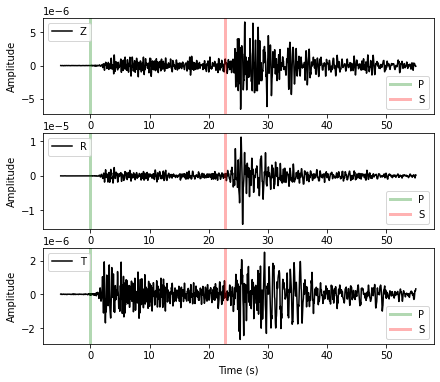

In [11]:
# Plot the waveform
from obspy import read
import matplotlib.pyplot as plt
import numpy as np

st = read("./Waveform.BHE")
st += read("./Waveform.BHN")
st += read("./Waveform.BHZ")
print(st)

tb = st[0].stats.sac.b
tp = st[0].stats.sac.t1
ts = st[0].stats.sac.t2
delta = st[0].stats.sac.delta
npts = int(60/delta)
bpoint = int((tp-5-tb)/delta)
time = np.arange(tp-5,tp-5+npts*delta,delta)

plt.subplots(figsize=(7, 6))
plt.subplot(3, 1, 1)
line1, = plt.plot(time-tp,st[0].data[bpoint:bpoint+npts], '-k', label="Z")
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
plt.legend(handles=[line2,line3], loc='lower right')

plt.subplot(3, 1, 2)
line1, = plt.plot(time-tp,st[1].data[bpoint:bpoint+npts], '-k', label="R")
plt.ylabel('Amplitude')
plt.legend(loc="upper left")
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
plt.legend(handles=[line2,line3], loc='lower right')

plt.subplot(3, 1, 3)
line1, = plt.plot(time-tp,st[2].data[bpoint:bpoint+npts], '-k', label="T")
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
first_legend = plt.legend(handles=[line1], loc='upper left')
plt.gca().add_artist(first_legend)
## Phase arrivals
line2 = plt.axvline(x=0, color='green', linewidth=3, alpha=0.3, label="P")
line3 = plt.axvline(x=ts-tp, color='red', linewidth=3, alpha=0.3, label="S")
plt.legend(handles=[line2,line3], loc='lower right')

plt.show()

In [12]:
delta

0.025

In [13]:
npts

2399